In [1]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\ssahi\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ssahi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\Users\ssahi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
"""
CIRCUIT TOPOLOGY
1-0 voltage source w/ resistance Vs, Rs
1-0 capacitor C1
1-2 resistor R1
2-3 inductor L1
3-0 capacitor C2
3-0 resistor R2

""" 

#CONSTANT PARAMETERS
#linear elements
Vs = 100
Rs = 1
C1 = 1
R1 = 0.2
L1 = 1
C2 = 1
R2 = 5

#Simulation parameters
dt = 0.1
Tstop = 20.1
t = np.linspace(dt,Tstop,200)
#print(t.shape)

#Conductance matrix, source vector, state variables
G_BE = np.zeros((3,3))
B_BE = np.zeros((1,3))
s = (3,len(t))
e_BE = np.zeros(s)

#Conductance matrix stamp values

gVs = 1/Rs
gR1 = 1/R1
gR2 = 1/R2

gC1_BE = C1/dt
gC2_BE = C2/dt
gL1_BE = dt/L1

#Initial values
# Backward Euler

vC1_BE = [0]
iC1_BE = [Vs/Rs]
vC2_BE = [0]
iC2_BE = [0]
iL1_BE = [0]
vL1_BE = [0]

# Constant source vector stamps
bVs = Vs/Rs
bR1 = 0
bR2 = 0

In [3]:
# setup conductance matrix
G_BE = np.matrix([ [gVs+gC1_BE+gR1,-gR1,0],[-gR1,gR1+gL1_BE,-gL1_BE],[0,-gL1_BE,gL1_BE+gC2_BE+gR2 ]])

# Simulation loop

for i in range(1,len(t)):
    
  
  #BACKWARD EULER
  #voltage and current through linear differential elements
    vC1_BE.append(e_BE[0,i-1])
    iC1_BE.append((C1/dt)*vC1_BE[i] - (C1/dt)*vC1_BE[i-1])
    vC2_BE.append(e_BE[2,i-1])
    iC2_BE.append((C2/dt)*vC2_BE[i] - (C2/dt)*vC2_BE[i-1])
    vL1_BE.append(e_BE[1,i-1] - e_BE[2,i-1])
    iL1_BE.append((dt/L1)*vL1_BE[i] + iL1_BE[i-1])
  
  # non-constant source vector stamp for linear elements
  # backward Euler
    bC1 = (C1/dt)*vC1_BE[i]
    bC2 = (C2/dt)*vC2_BE[i]
    bL1 = -iL1_BE[i]

  # setup source vector
    B_BE = np.array([ [bVs+bC1+bR1],[-bR1+bL1], [-bL1+bC2+bR2 ]])
    # To check values
    #print(B_BE)
  # update number of iterations, new guess for e, and error
    e_BE[:,[i]] = G_BE.I*B_BE

#vC2_BE = np.array(vC2_BE)
#print(vC2_BE.shape)
#print(e_BE)

C:\Users\ssahi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
C:\Users\ssahi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
C:\Users\ssahi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]


Text(0.5, 1.0, 'Backward Euler')

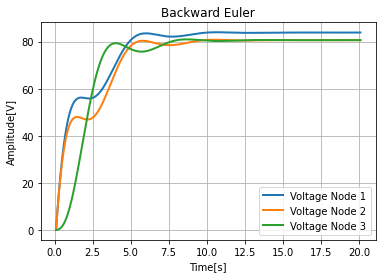

In [4]:
# Plots
"""
plt.plot(t,iC1_BE,t,iC2_BE,t,iL1_BE,lineWidth=2)
plt.grid()
plt.legend(['current C1','current C2','current L1'])
plt.xlabel('Time[s]')
plt.ylabel('Current[A]')
plt.title('Backward Euler')
"""

# Backward Euler
plt.figure
plt.plot(t,e_BE[0,:],t,e_BE[1,:],t,e_BE[2,:],lineWidth=2)
#plt.plot(t,vC1_BE,t,vC2_BE,t,vL1_BE,lineWidth=2)
plt.grid()
plt.legend(['Voltage Node 1','Voltage Node 2','Voltage Node 3'])
plt.xlabel('Time[s]')
plt.ylabel('Amplitude[V]')
plt.title('Backward Euler')


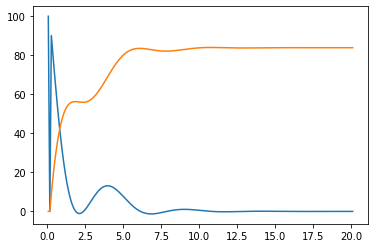

In [13]:
plt.plot(t,iC1_BE,t,vC1_BE)
#print(vC1_BE)

In [5]:
e_BE

array([[ 0.        ,  9.01135857, 17.05598062, 24.16536534, 30.37954485,
        35.74594339, 40.31818558, 44.15488062, 47.31840721, 49.87372192,
        51.88721107, 53.42560363, 54.55496021, 55.33974998, 55.84202534,
        56.12070091, 56.23094136, 56.22366007, 56.14512832, 56.03669294,
        55.93459841, 55.86990793, 55.8685166 , 55.95124891, 56.13403168,
        56.42813331, 56.84045944, 57.37389526, 58.0276845 , 58.7978355 ,
        59.67754502, 60.65763081, 61.72696492, 62.87290001, 64.08168195,
        65.3388428 , 66.62956903, 67.93904074, 69.25273864, 70.55671621,
        71.83783538, 73.08396503, 74.28414188, 75.42869464, 76.50933229,
        77.51919833, 78.452893  , 79.30646613, 80.07738322, 80.76446799,
        81.36782441, 81.88874156, 82.32958457, 82.69367485, 82.98516283,
        83.20889604, 83.37028555, 83.47517315, 83.52970178, 83.54019114,
        83.51302047, 83.45451977, 83.37087095, 83.26801958, 83.15159817,
        83.02686118, 82.898632  , 82.77126183, 82.6